# Approch 2 : Fully connected CNN For Lane Detection 

#### Testing the model 

In [6]:
# import the libaries

import numpy as np
import cv2,glob,os
import matplotlib.image as mpimg
from skimage.transform import resize
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from keras.models import model_from_json
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf


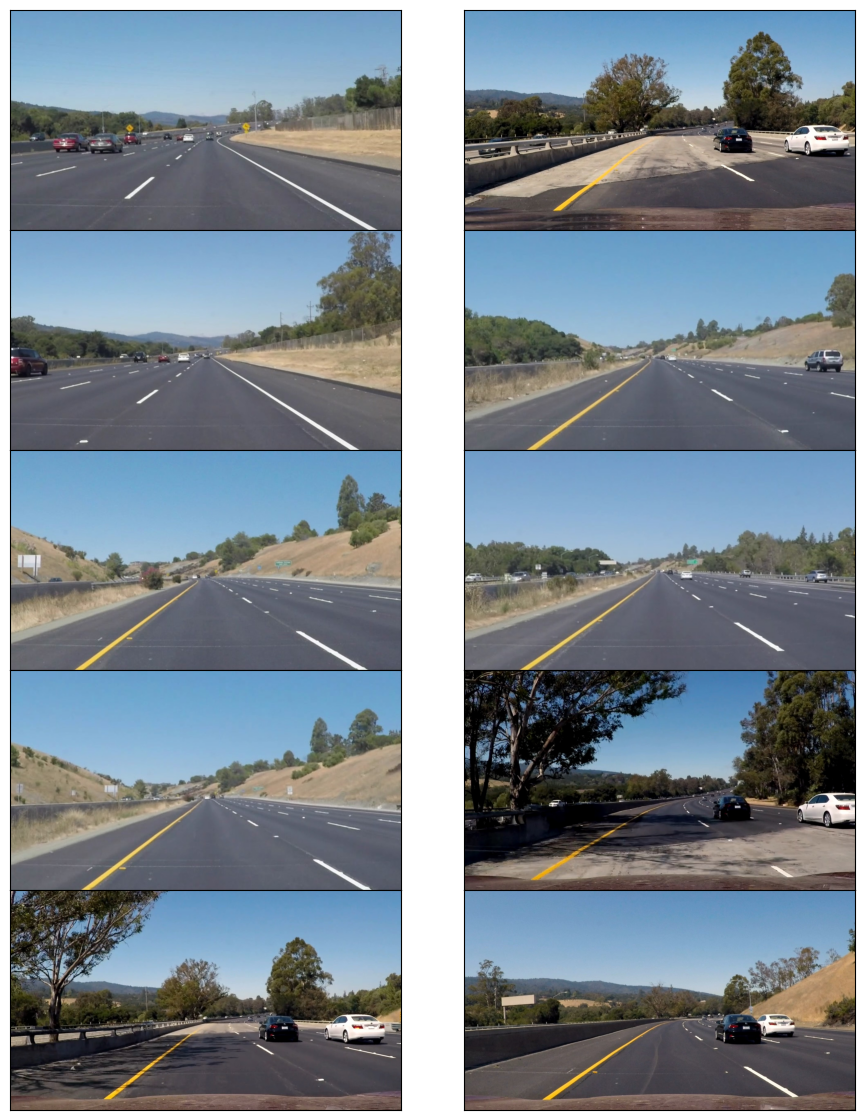

In [7]:
# plot the testing image

# show the images 
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(10, 11))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]

show_images(test_images)

In [8]:
# Load pretrained model

# load the model json file 
json_file = open('model.json', 'r')
json_model = json_file.read()
json_file.close()

# load the model from the json
model = model_from_json(json_model)
# load the wieghts of the model
model.load_weights('model.h5')

In [9]:
# create a class Lane 

# Class to average lanes with
class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

In [37]:
# resize the image and predict the lane to be drawn from the model in G color

def road_lines_image(image):
    
    img_arr = cv2.imread(image)
    actual_image = cv2.resize(img_arr, (1280, 720), interpolation=cv2.INTER_LINEAR)

    # Get image ready for feeding into model
    img = mpimg.imread(image)
    small_img_2 = cv2.resize(img, (160, 80), interpolation=cv2.INTER_LINEAR)
    small_img_1= np.array(small_img_2)
    small_img = small_img_1[None, :, :, :]

    # Make prediction with neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255

    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)
    # Only using last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Calculate average detection
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis = 0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    # Re-size to match the original image
    lane_image = resize(lane_drawn, (720, 1280, 3))

    # Merge the lane drawing onto the original image
    #result = cv2.addWeighted(actual_image, 1, lane_image, 1, 0)
    result = cv2.addWeighted(actual_image.astype(lane_image.dtype), 1, lane_image, 1, 0)

    print(prediction)
    return result

# predict the lane detector 

#create a lanes object
lanes = Lanes()

for path in glob.glob('test_images/*.jpg'):
    res_img = road_lines_image(path)
    names = [os.path.basename(x) for x in glob.glob(path)]   
    out_path = 'test_predict/'+names[0]
    # save the result in a image
    cv2.imwrite(out_path,res_img)

# plot the predicted result



1/1 [==============================] - 0s 64ms/step
[[[ 3.5144367]
  [ 2.1656494]
  [ 1.6527472]
  ...
  [ 0.3742443]
  [ 2.6149545]
  [ 5.0783553]]

 [[ 4.1716065]
  [ 6.748863 ]
  [ 6.3280616]
  ...
  [ 4.1848497]
  [ 5.746603 ]
  [ 5.2477345]]

 [[ 7.664615 ]
  [11.704958 ]
  [15.064601 ]
  ...
  [ 9.63573  ]
  [ 9.531495 ]
  [ 8.35032  ]]

 ...

 [[14.86162  ]
  [23.407421 ]
  [27.31962  ]
  ...
  [26.428791 ]
  [21.154385 ]
  [11.667184 ]]

 [[16.299654 ]
  [27.084637 ]
  [31.553066 ]
  ...
  [30.179846 ]
  [21.89556  ]
  [10.169522 ]]

 [[12.779252 ]
  [19.970442 ]
  [28.019896 ]
  ...
  [29.865131 ]
  [18.429699 ]
  [10.205641 ]]]
1/1 [==============================] - 0s 60ms/step
[[[ 3.5143316]
  [ 2.1653485]
  [ 1.6519694]
  ...
  [ 0.3864307]
  [ 2.6204348]
  [ 5.08032  ]]

 [[ 4.171174 ]
  [ 6.747898 ]
  [ 6.3262544]
  ...
  [ 4.215445 ]
  [ 5.758307 ]
  [ 5.2533584]]

 [[ 7.6635056]
  [11.702866 ]
  [15.060553 ]
  ...
  [ 9.699037 ]
  [ 9.561898 ]
  [ 8.365265 ]]

 ...

 [

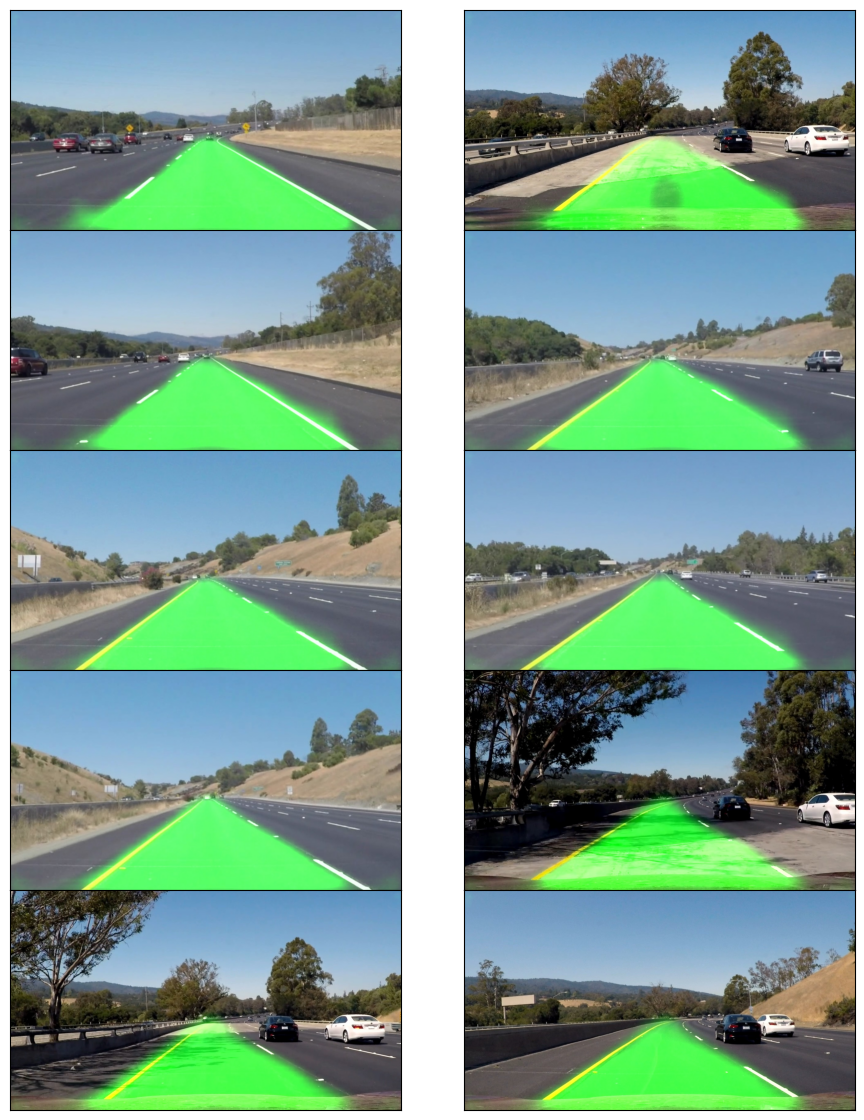

In [38]:
predicted_images = [plt.imread(path) for path in glob.glob('test_predict/*.jpg')]

show_images(predicted_images)